Mounted at /content/drive
LASSO R²: 0.8568858801347281
LASSO RMSE: 204.67945678044646


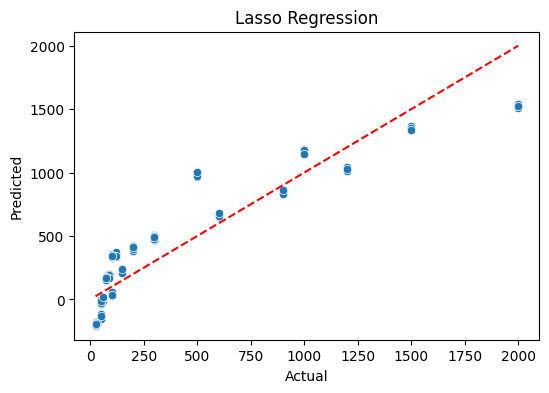

RIDGE R²: 0.8568957245090659
RIDGE RMSE: 204.6724170283756


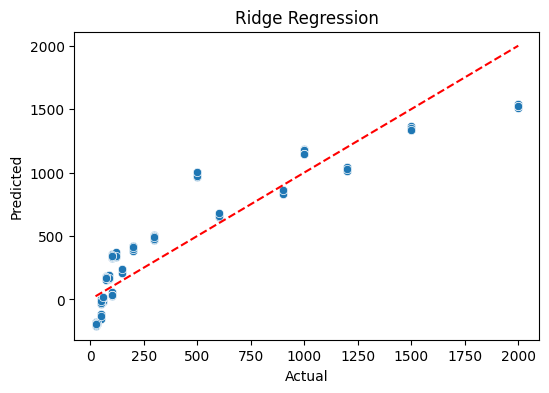

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')
data = data.dropna()
X = data[['Age','Quantity','Price per Unit']]
y = data['Total Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m1 = Lasso(alpha=0.1)
m1.fit(X_train, y_train)
p1 = m1.predict(X_test)
print("LASSO R²:", r2_score(y_test,p1))
print("LASSO RMSE:", np.sqrt(mean_squared_error(y_test,p1)))
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=p1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Lasso Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

m2 = Ridge(alpha=1.0)
m2.fit(X_train, y_train)
p2 = m2.predict(X_test)
print("RIDGE R²:", r2_score(y_test,p2))
print("RIDGE RMSE:", np.sqrt(mean_squared_error(y_test,p2)))
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=p2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Ridge Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
